<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
# import piplite
# await piplite.install(['numpy'],['pandas'])
# await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
# from js import fetch
# import io

# URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
# resp = await fetch(URL)
# boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv('boston_housing.csv')
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
boston_df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6


#### Add your code below following the instructions given in the course to complete the peer graded assignment


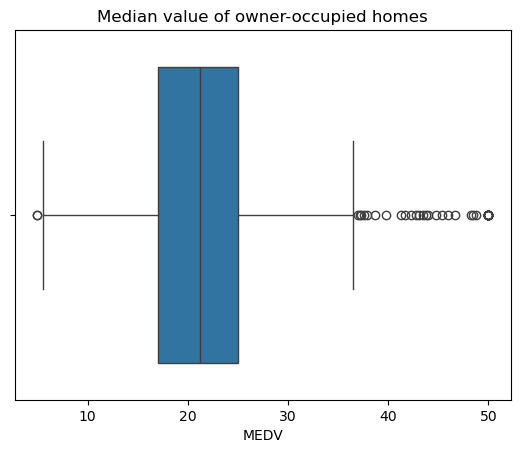

In [11]:
ax = sns.boxplot(x='MEDV', data=boston_df)
ax.set_title("Median value of owner-occupied homes")
plt.show()

In [12]:
boston_df['CHAS'].unique()

array([0., 1.])

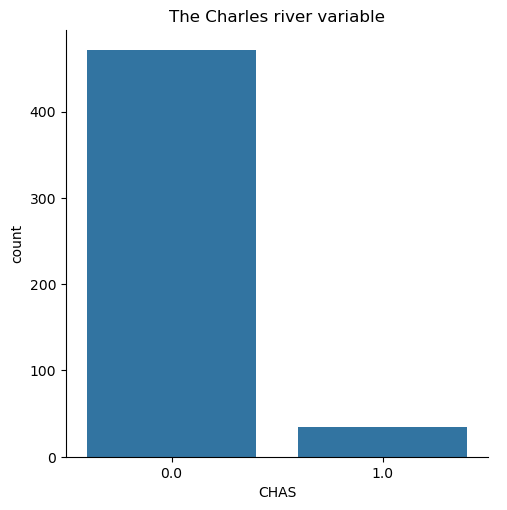

In [13]:
ax = sns.catplot(x='CHAS', kind='count', data= boston_df)
plt.title('The Charles river variable')
plt.show()

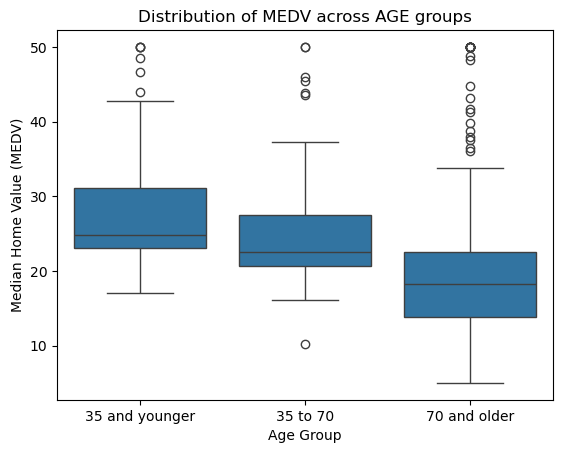

In [14]:
bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', '35 to 70', '70 and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Distribution of MEDV across AGE groups')
plt.xlabel('Age Group')
plt.ylabel('Median Home Value (MEDV)')
plt.show()

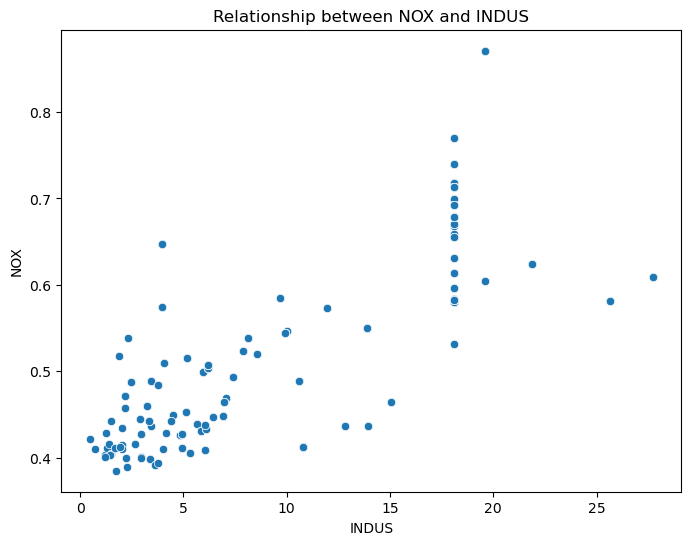

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Relationship between NOX and INDUS')
plt.show()

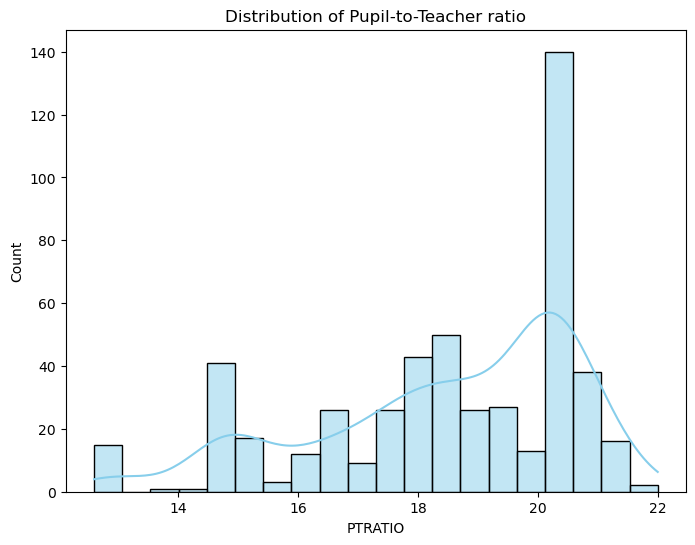

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Pupil-to-Teacher ratio')
plt.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**State the hypothesis:**

- **Null (H_0):** There is no significant difference in MEDV between homes bounded by the Charles River (CHAS=1) and those not (CHAS=0)
- **Alternative (H_1):** There is a significant difference in MEDV between the two groups.

In [19]:
from scipy.stats import ttest_ind

river_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
river_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = ttest_ind(river_yes, river_no, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

T-statistic: 3.1133, p-value: 0.0036


#### Conclusion:

Here, α = 0.05   
Since p-value < 0.05, we can conclude that homes near the river tend to have higer medican values.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built priorto 1940 (AGE)? (ANOVA)

**State the hypothesis:**

- **Null (H_0):** All AGE groups have the same mean MEDV. 
- **Alternative (H_1):** At least one AGE group has a different mean MEDV

In [23]:
from scipy.stats import f_oneway

bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', '35 to 70', '70 and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

group1 = boston_df[boston_df['AGE_group'] == '35 and younger']['MEDV']
group2 = boston_df[boston_df['AGE_group'] == '35 to 70']['MEDV']
group3 = boston_df[boston_df['AGE_group'] == '70 and older']['MEDV']

f_stat, p_val = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

F-statistic: 36.4076, p-value: 0.0000


#### Conclusion:

Here, α = 0.05   
Since p-value < 0.05, we can conclude that older neighborhoods may have lower or higher values depending on location and amenities

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**State the hypothesis:**

- **H₀:** There is no linear relationship between NOX and INDUS
- **H₁:** There is a linear relationship between NOX and INDUS

In [27]:
from scipy.stats import pearsonr

corr_coef, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Correlation Coefficient: {corr_coef:.4f}, p-value: {p_val:.4f}")

Correlation Coefficient: 0.7637, p-value: 0.0000


#### Conclusion:

Here, α = 0.05   
Since p-value < 0.05, we can conclude that there is a linear relationship between NOX and INDUS.

### What is the impact of an additional weighted distance to the five Boston employment centres on the medianvalue of owner occupied homes? (Regression analysis)

**State the hypothesis:**

- **H₀:** DIS (weighted distance to employment centers) has no effect on MEDV
- **H₁:** DIS significantly affects MEDV

In [31]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        18:43:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0